¡Hola, Humber!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:






<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>



# Proyecto 11

## Descripción del proyecto

Has recibido una tarea analítica de una tienda en línea internacional. Tus predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron (para iniciar una granja de sandías en Brasil). Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

## Importación de librerías

In [158]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats as st
import math as mth
from scipy.stats import ttest_ind

### Abrir el archivo de datos y leer la información general

In [159]:
pd.set_option('display.max_columns', None)

calendar = pd.read_csv('datasets/ab_project_marketing_events_us.csv') 
events = pd.read_csv('datasets/final_ab_events_upd_us.csv') 
users = pd.read_csv('datasets/final_ab_new_users_upd_us.csv')
participants = pd.read_csv('datasets/final_ab_participants_upd_us.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Paso 1. Exploración de datos

#### El calendario de eventos de marketing para 2020

In [160]:
#Revisando la información del dataframe calendar
calendar.info()
calendar.sort_values('start_dt').head(14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


#### El dataframe de Eventos

In [161]:
#Revisando la información del dataframe events
events.info()
events.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [162]:
duplicates = events.duplicated().sum() 
print(duplicates)
print(events['event_dt'].min(), events['event_dt'].max())

print(events.groupby('details').agg({'event_name': ['unique']})
)

0
2020-12-07 00:00:33 2020-12-30 23:36:33
         event_name
             unique
details            
4.99     [purchase]
9.99     [purchase]
99.99    [purchase]
499.99   [purchase]


#### El dataframe de usuarios

In [163]:
#Revisando la información del dataframe users
users.info()
users.head()
print(users['first_date'].min(), users['first_date'].max())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
2020-12-07 2020-12-23


#### El dataframe de Participantes

In [164]:
#Revisando la información del dataframe participants
participants.info()
participants.head()

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


### Conversión de datos y detección de duplicados

Unimos las tablas de Usuarios con Participantes para filtrar solo a los que participaron dentro de la prueba, y a su vez unimos esta unión con la tabla de Eventos para obtener los eventos relacionados al scope actual en un dataframe consolidado.

In [165]:
#Unimos las tablas de Usuarios con Participantes para filtrar solo a los que participaron dentro de la prueba, y a su vez unimos esta unión con la tabla de Eventos para obtener los eventos relacionados al scope actual en un dataframe consolidado.
user_participants = pd.merge(users, participants, on='user_id', how='inner')
 
consolidated = pd.merge(user_participants, events, on='user_id', how='inner')

consolidated = consolidated.drop_duplicates()

print(consolidated.info())
print(consolidated.head())
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102838 entries, 0 to 102837
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     102838 non-null  object 
 1   first_date  102838 non-null  object 
 2   region      102838 non-null  object 
 3   device      102838 non-null  object 
 4   group       102838 non-null  object 
 5   ab_test     102838 non-null  object 
 6   event_dt    102838 non-null  object 
 7   event_name  102838 non-null  object 
 8   details     14854 non-null   float64
dtypes: float64(1), object(8)
memory usage: 7.1+ MB
None
            user_id  first_date region device group                  ab_test  \
0  D72A72121175D8BE  2020-12-07     EU     PC     A  recommender_system_test   
1  D72A72121175D8BE  2020-12-07     EU     PC     A  recommender_system_test   
2  2E1BF1D4C37EA01F  2020-12-07     EU     PC     A        interface_eu_test   
3  2E1BF1D4C37EA01F  2020-12-07     EU     PC     A

In [166]:

consolidated['first_date'] = pd.to_datetime(consolidated['first_date'], format='%Y-%m-%d')
consolidated['event_dt'] = pd.to_datetime(consolidated['event_dt'], format='%Y-%m-%d %H:%M:%S')

print(consolidated.info())
print(consolidated.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102838 entries, 0 to 102837
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     102838 non-null  object        
 1   first_date  102838 non-null  datetime64[ns]
 2   region      102838 non-null  object        
 3   device      102838 non-null  object        
 4   group       102838 non-null  object        
 5   ab_test     102838 non-null  object        
 6   event_dt    102838 non-null  datetime64[ns]
 7   event_name  102838 non-null  object        
 8   details     14854 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 7.1+ MB
None
            user_id first_date region device group                  ab_test  \
0  D72A72121175D8BE 2020-12-07     EU     PC     A  recommender_system_test   
1  D72A72121175D8BE 2020-12-07     EU     PC     A  recommender_system_test   
2  2E1BF1D4C37EA01F 2020-12-07     EU 

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo,   solamente antes de proceder con el análisi debemos de realizar los siguientes filtros que nos mencionan en el proyecto:
    
    - verificar que las fechas de aplicación corresponden con lo que indica el ejercicio (fechas entre 2020-12-07 y 2021-01-01)
    - Verificar que consideramos los primeros 14 días desde que se registraron los usuarios
   

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
    Buen dia estimado. Gracias por la observación, procedo a hacer el filtrado correspondiente. 
    Quedo pendiente ante cualquier comentario u omisión de mi parte.
</div>



### Preparar los datos para el análisis

In [167]:
#Filtrando los participantes únicos por ab_test eligiendo a aquellos que pertenezcan a la prueba recommender_system_test y asignándolos a un nuevo dataframe
consolidated_df = consolidated[(consolidated['ab_test'] == 'recommender_system_test')]


#Verificar que las fechas de aplicación corresponden con lo que indica el ejercicio (fechas entre 2020-12-07 y 2021-01-01)
start_date_event = pd.to_datetime('2020-12-07').date()
end_date_event = pd.to_datetime('2021-01-01').date()

consolidated_df['event_date'] = pd.to_datetime(consolidated_df['event_dt']).dt.date
consolidated_df['first_date'] = pd.to_datetime(consolidated_df['first_date']).dt.date

consolidated_df = consolidated_df[(consolidated_df['event_date'] >= start_date_event) & (consolidated_df['event_date'] <= end_date_event)]


#Verificar que consideramos los primeros 14 días desde que se registraron los usuarios
consolidated_df = consolidated_df[(pd.to_datetime(consolidated_df['event_date']) - pd.to_datetime(consolidated_df['first_date'])).dt.days <= 14]

#También filtramos para aquellos que se realizaron donde la region sea EU
consolidated_df = consolidated_df[(consolidated_df['region'] == 'EU')]

consolidated_df = consolidated_df.reset_index(drop=True)
print(consolidated_df.info())
print(consolidated_df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22157 entries, 0 to 22156
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     22157 non-null  object        
 1   first_date  22157 non-null  object        
 2   region      22157 non-null  object        
 3   device      22157 non-null  object        
 4   group       22157 non-null  object        
 5   ab_test     22157 non-null  object        
 6   event_dt    22157 non-null  datetime64[ns]
 7   event_name  22157 non-null  object        
 8   details     3018 non-null   float64       
 9   event_date  22157 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 1.7+ MB
None
                user_id  first_date region   device group  \
22152  0416B34D35C8C8B8  2020-12-20     EU  Android     A   
22153  0416B34D35C8C8B8  2020-12-20     EU  Android     A   
22154  0416B34D35C8C8B8  2020-12-20     EU  Android     

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\3911971925.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\3911971925.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Paso 2. Lleva a cabo el análisis exploratorio de datos:


In [168]:
#¿Cuántos eventos hay en los registros?
print("Existen", consolidated_df['event_name'].nunique(), "eventos diferentes en los registros.")
print("Los eventos son:", consolidated_df['event_name'].unique()) 

Existen 4 eventos diferentes en los registros.
Los eventos son: ['product_page' 'login' 'purchase' 'product_cart']


In [169]:
#¿Cuántos usuarios hay en los registros?
print("Existen", consolidated_df['user_id'].nunique(), "usuarios únicos en los registros.")
#¿Cuántos usuarios hay en cada grupo de la prueba A/B?
print(consolidated_df.groupby('group')['user_id'].nunique()) 

Existen 3481 usuarios únicos en los registros.
group
A    2604
B     877
Name: user_id, dtype: int64


In [170]:
#¿Cuál es el promedio de eventos por usuario?
print("El promedio de eventos por usuario es:", consolidated_df.groupby('user_id')['event_name'].count().mean()) 

El promedio de eventos por usuario es: 6.3651249640907785


### Estudia la conversión en las diferentes etapas del embudo.

In [171]:
#Mostramos la cantidad de usuarios que realizaron cada una de las acciones. Ordenamos los eventos por el número de usuarios.
print("La cantidad de usuarios que realizaron cada evento es:")
print(consolidated_df.groupby('event_name')['user_id'].nunique().sort_values(ascending=False))

La cantidad de usuarios que realizaron cada evento es:
event_name
login           3480
product_page    2178
purchase        1082
product_cart    1026
Name: user_id, dtype: int64


Vamos a suponer que el embudo consiste en la siguiente secuencia:

login → product_page → product_cart → purchase

Y filtramos por el grupo B, sobre el cual se pretende probar el nuevo embudo de pago

In [172]:
#Utilizamos el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. 
ordered_events = ['login', 'product_page', 'product_cart', 'purchase']
consolidated_df['event_name'] = pd.Categorical(consolidated_df['event_name'], categories=ordered_events, ordered=True)

consolidated_df = consolidated_df.sort_values(by='event_name')
consolidated_df_group_a = consolidated_df[consolidated_df['group'] == 'A']
consolidated_df_group_b = consolidated_df[consolidated_df['group'] == 'B']

users_by_event_a = consolidated_df_group_a.groupby('event_name')['user_id'].nunique().reset_index()
users_by_event_b = consolidated_df_group_b.groupby('event_name')['user_id'].nunique().reset_index()
 

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\126074472.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\126074472.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [173]:
users_by_event_a['user_in_ps'] = users_by_event_a['user_id'].shift(1)
users_by_event_a['cr_ps'] = users_by_event_a['user_id'] / users_by_event_a['user_in_ps']


users_by_event_b['user_in_ps'] = users_by_event_b['user_id'].shift(1)
users_by_event_b['cr_ps'] = users_by_event_b['user_id'] / users_by_event_b['user_in_ps']


In [174]:
#¿En qué etapa pierdes más usuarios en el grupo B?
fig = go.Figure(go.Funnel(
    y=users_by_event_b['event_name'],
    x=users_by_event_b['user_id'],
    textinfo="value+percent initial")
)

fig.show()




Se pierden mas usuarios en el vento de **product_page**

Curiosamente, el evento de **purchase** es ligeramente mayor (102%) al evento inmediato anterior. Se puede preveer que puede efectuarse la compra de un producto directamente sin pasar por el evento de **product_cart**

El **28%** de los usuarios realizan todo el viaje desde el login hasta purchase

In [175]:
#¿En qué etapa pierdes más usuarios en el grupo A?
fig = go.Figure(go.Funnel(
    y=users_by_event_a['event_name'],
    x=users_by_event_a['user_id'],
    textinfo="value+percent initial")
)

fig.show()


Realizando el mismo proceso pero dentro del grupo A (Control), se puede observar un comportamiento similar respecto al grupo B (nuevo embudo de pago)

### ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

In [176]:
events_by_user = consolidated_df.groupby(['group', 'event_name']).agg({'user_id': ['count','nunique']})
print(events_by_user)

                   user_id        
                     count nunique
group event_name                  
A     login           7706    2604
      product_page    4953    1685
      product_cart    2316     782
      purchase        2402     833
B     login           2307     876
      product_page    1238     493
      product_cart     619     244
      purchase         616     249


C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\2896087954.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



El número de eventos por usuario está distribuido entre las muestras

### ¿Hay usuarios que están presentes en ambas muestras?

In [177]:
# Buscamos usuarios que están en ambos grupos
users_in_a = set(consolidated_df[consolidated_df['group'] == 'A']['user_id'])
users_in_b = set(consolidated_df[consolidated_df['group'] == 'B']['user_id'])
duplicated_users = users_in_a.intersection(users_in_b)

print(f"Número de usuarios presentes en ambos grupos: {len(duplicated_users)}")


Número de usuarios presentes en ambos grupos: 0


### ¿Cómo se distribuye el número de eventos entre los días?

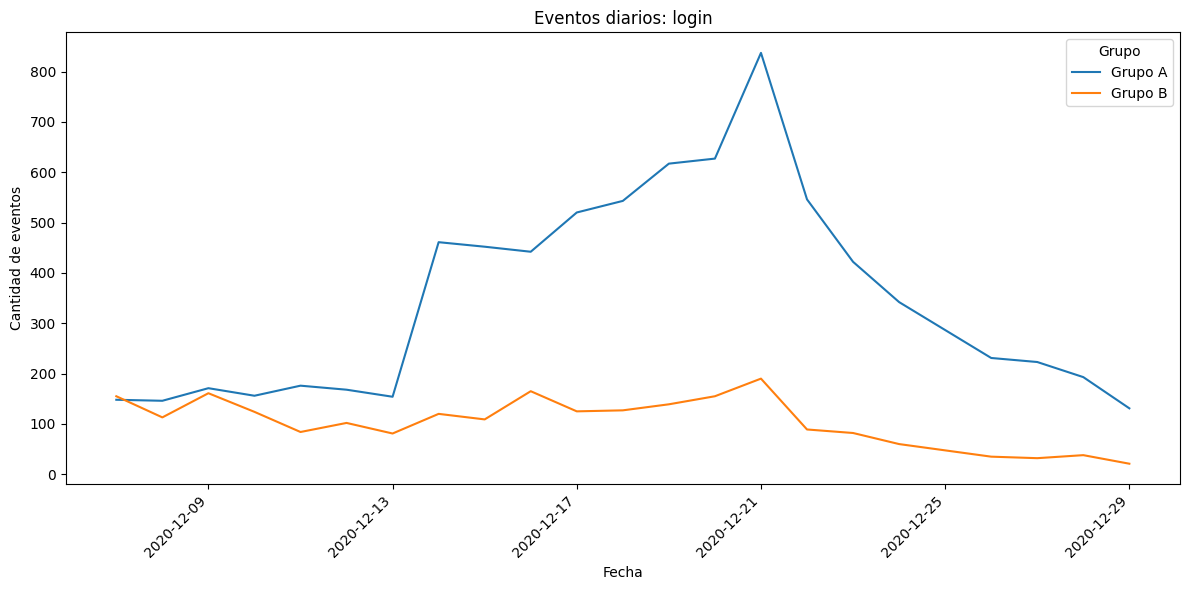

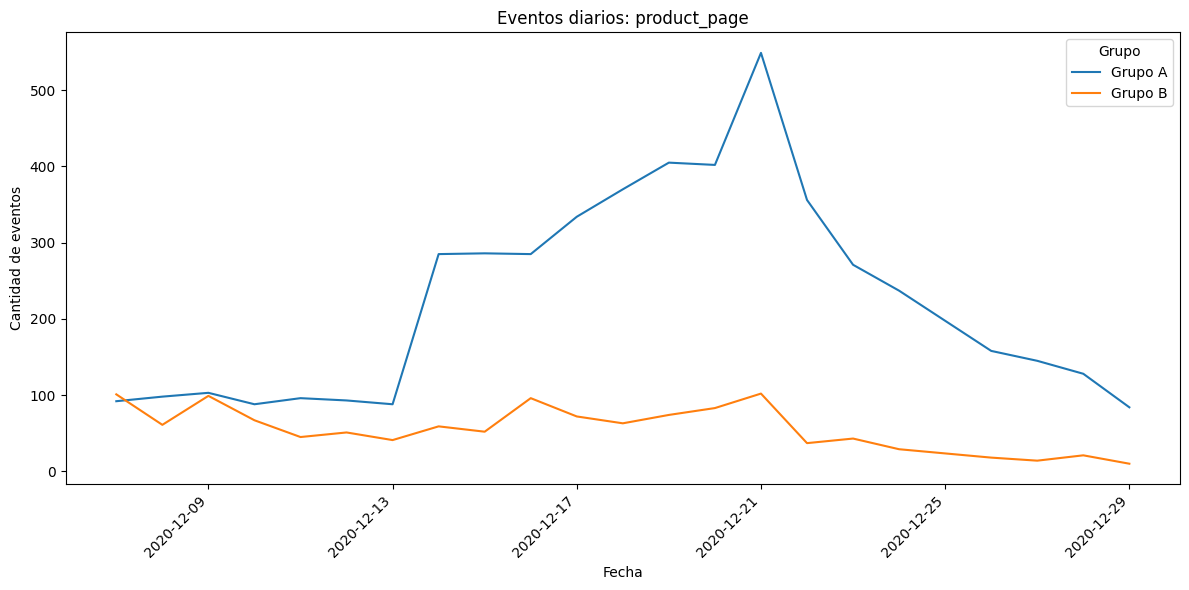

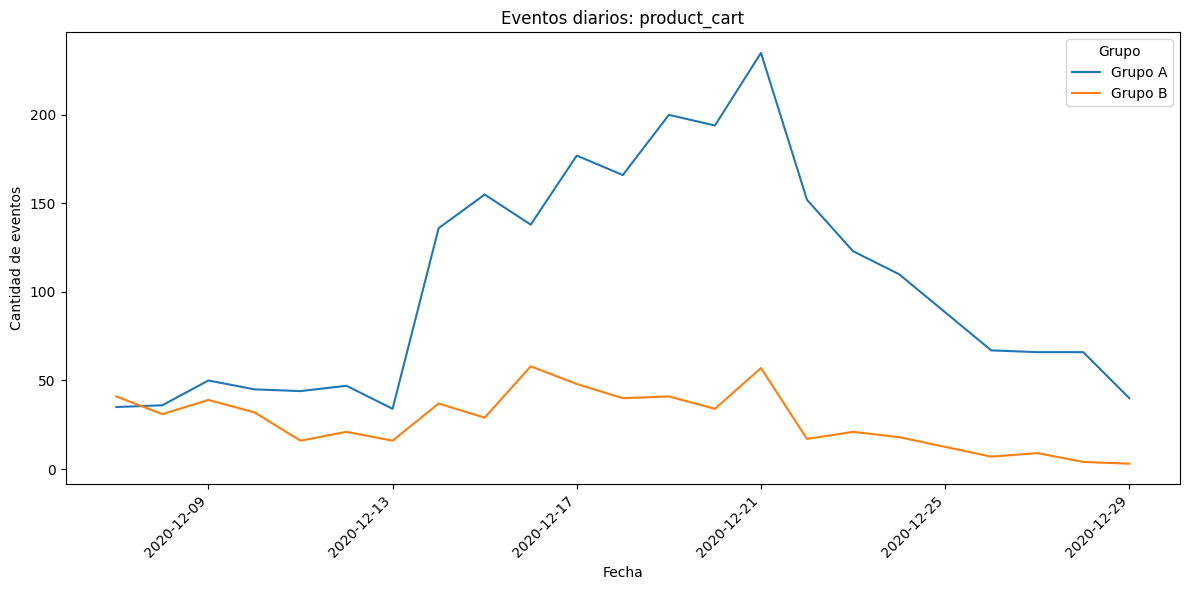

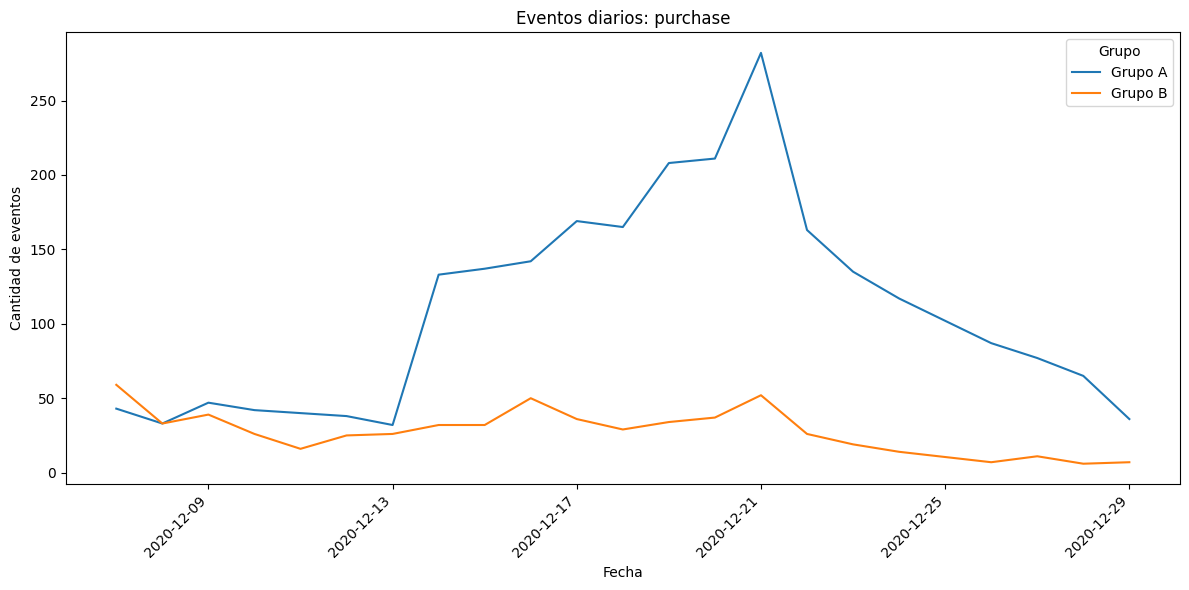

In [178]:
events = ['login', 'product_page', 'product_cart', 'purchase']

def plot_events_by_day(event_name):
    plt.figure(figsize=(12, 6))

    # Grupo A
    group_a = consolidated_df[(consolidated_df['event_name'] == event_name) & (consolidated_df['group'] == 'A')]
    counts_a = group_a.groupby('event_date').size()
    plt.plot(counts_a.index, counts_a.values, label='Grupo A')

    # Grupo B
    group_b = consolidated_df[(consolidated_df['event_name'] == event_name) & (consolidated_df['group'] == 'B')]
    counts_b = group_b.groupby('event_date').size()
    plt.plot(counts_b.index, counts_b.values, label='Grupo B')

    plt.title(f'Eventos diarios: {event_name}')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de eventos')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Grupo')
    plt.tight_layout()
    plt.show()

for event in events:
    plot_events_by_day(event)


Comparando ambos grupos y analizando los eventos existentes en su respectivo orden, se aprecia notoriamente las compras decembrinas a la alza previamente a la **Christmas&New Year Promo** que se activa a partir del 25 de diciembre hasta el 3 de enero del siguiente año.

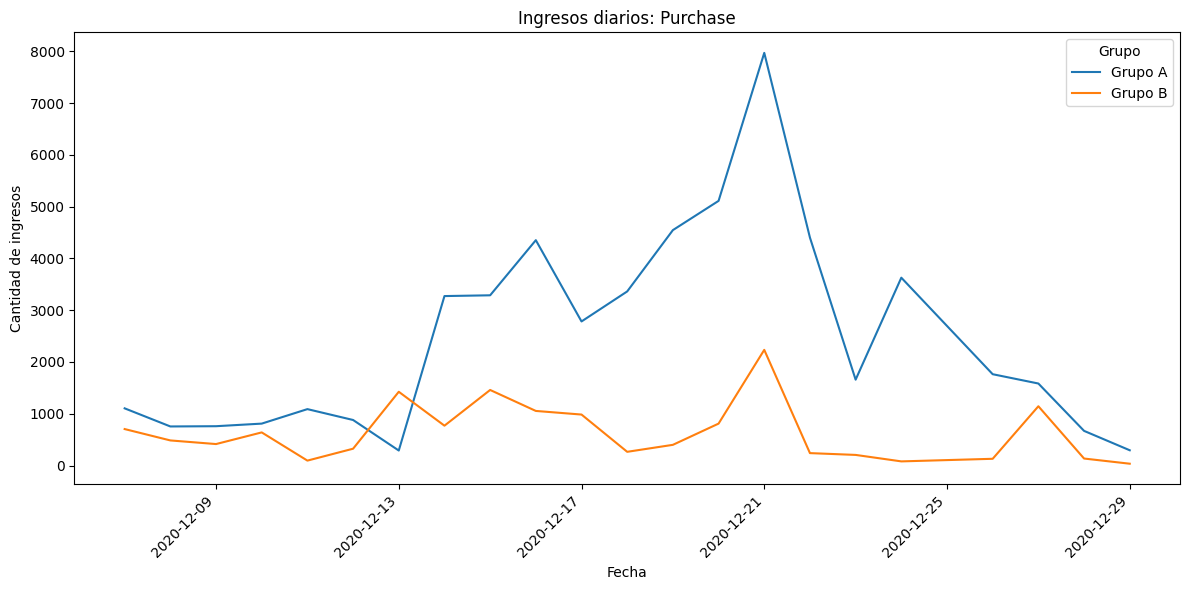

In [179]:

plt.figure(figsize=(12, 6))

# Grupo A
group_a = consolidated_df[(consolidated_df['event_name'] == 'purchase') & (consolidated_df['group'] == 'A')]
revenue_a = group_a.groupby('event_date')['details'].sum()
plt.plot(revenue_a.index, revenue_a.values, label='Grupo A')

# Grupo B
group_b = consolidated_df[(consolidated_df['event_name'] == 'purchase') & (consolidated_df['group'] == 'B')]
revenue_b = group_b.groupby('event_date')['details'].sum()
plt.plot(revenue_b.index, revenue_b.values, label='Grupo B')

plt.title(f'Ingresos diarios: Purchase')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ingresos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()
 



### ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

In [180]:
print(revenue_a.sum())
print(revenue_b.sum())

print(revenue_b.sum() / (revenue_b.sum() + revenue_a.sum()) * 100)

54385.98
14033.84
20.511366443232383


In [181]:
print("Fechas mínimas y máximas de eventos:", consolidated_df['event_dt'].min(), consolidated_df['event_dt'].max())
print("Eventos nulos por columna:\n", consolidated_df.isnull().sum())

Fechas mínimas y máximas de eventos: 2020-12-07 00:05:57 2020-12-29 23:38:29
Eventos nulos por columna:
 user_id           0
first_date        0
region            0
device            0
group             0
ab_test           0
event_dt          0
event_name        0
details       19139
event_date        0
dtype: int64


Aunque los usuarios del grupo B representan el 25% del total de usuarios, las ganancias obtenidas de dicho grupo son del 20.76%

## Paso 3. Evaluar los resultados de la prueba A/B:

### ¿Qué puedes decir sobre los resultados de la prueba A/B? Utiliza una prueba z para comprobar la diferencia estadística entre las proporciones

In [182]:
consolidated_df.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,event_date
22156,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test,2020-12-24 09:12:49,login,NaN,2020-12-24
7951,7EC3FA725BF73DB7,2020-12-21,EU,PC,A,recommender_system_test,2020-12-22 03:20:37,login,NaN,2020-12-22
7952,7EC3FA725BF73DB7,2020-12-21,EU,PC,A,recommender_system_test,2020-12-29 04:14:06,login,NaN,2020-12-29
7953,DD155919BA4AC26E,2020-12-21,EU,Android,A,recommender_system_test,2020-12-21 08:27:25,login,NaN,2020-12-21
7954,DD155919BA4AC26E,2020-12-21,EU,Android,A,recommender_system_test,2020-12-23 09:33:33,login,NaN,2020-12-23


In [183]:
users_by_group = consolidated_df.pivot_table(
    index='group',
    values='user_id',
    aggfunc='nunique' 
)

print("Los usuarios por grupo son:")
users_by_group

Los usuarios por grupo son:


,user_id
group,
A,2604
B,877


In [184]:
users_by_group_event = consolidated_df.pivot_table(
    index='event_name', 
    values='user_id', 
    columns='group',
    aggfunc='nunique'
)

users_by_group_event

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\471144637.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



group,A,B
event_name,,
login,2604,876
product_page,1685,493
product_cart,782,244
purchase,833,249


In [185]:
def check_hypothesis(success_1, success_2, trials_1, trials_2, alpha=0.01):
    p1 = success_1 / trials_1
    p2 = success_2 / trials_2
    p = (success_1 + success_2) / (trials_1 + trials_2)
    
    z = (p1 - p2) / mth.sqrt(p * (1 - p) * (1 / trials_1 + 1 / trials_2))
    
    p_value = 2 * (1 - st.norm.cdf(abs(z)))
    
    print("p_value: ", p_value)

    if p_value < alpha:
        print("Se rechaza la hipótesis nula")
        print("Z-score: ", z)
        return True, z, p_value
    else:
        print("Fallo al rechazar la hipótesis nula")
        print("Z-score: ", z)
        return False, z, p_value

In [186]:
def check_event_hypothesis(users_by_group_event, users_by_group, event, exp1, exp2):
    frac1 = users_by_group_event.loc[event, exp1] / users_by_group.loc[exp1]
    frac2 = users_by_group_event.loc[event, exp2] / users_by_group.loc[exp2]


    print(f'{frac1} con {event} evento en el grupo {exp1}')
    print(f'{frac2} con {event} evento en el grupo {exp2}')

    check_hypothesis(users_by_group_event.loc[event, exp1],
                     users_by_group_event.loc[event, exp2],
                     users_by_group.loc[exp1],
                     users_by_group.loc[exp2])
     

In [187]:
for event in users_by_group_event.index:
    check_event_hypothesis(users_by_group_event, users_by_group, event, 'A', 'B')

user_id    1.0
Name: A, dtype: float64 con login evento en el grupo A
user_id    0.99886
Name: B, dtype: float64 con login evento en el grupo B
p_value:  [0.08481837]
Fallo al rechazar la hipótesis nula
Z-score:  user_id    1.723388
dtype: float64
user_id    0.647081
Name: A, dtype: float64 con product_page evento en el grupo A
user_id    0.562144
Name: B, dtype: float64 con product_page evento en el grupo B
p_value:  [6.94273936e-06]
Se rechaza la hipótesis nula
Z-score:  user_id    4.495436
dtype: float64
user_id    0.300307
Name: A, dtype: float64 con product_cart evento en el grupo A
user_id    0.278221
Name: B, dtype: float64 con product_cart evento en el grupo B
p_value:  [0.21469192]
Fallo al rechazar la hipótesis nula
Z-score:  user_id    1.240767
dtype: float64
user_id    0.319892
Name: A, dtype: float64 con purchase evento en el grupo A
user_id    0.283922
Name: B, dtype: float64 con purchase evento en el grupo B
p_value:  [0.04652483]
Fallo al rechazar la hipótesis nula
Z-sc

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\2433489436.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\2433489436.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\2433489436.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead

C:\Users\Humberto Barrera\AppData\Local\Temp\ipykernel_35156\2433489436.py:6: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead




<div class="alert alert-block alert-success">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con el calculo de la z-score y con el desarrollo de la prueba de hipótesis.



## Paso 4. Describe tus conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B

### Conclusiones:

- **Distribución de eventos:** El número de usuarios y la frecuencia de eventos como `login`, `product_page`, `product_cart` y `purchase` es mayor en el grupo A que en el grupo B, lo que indica que el grupo A tiene una mayor participación o tamaño de muestra. Véase ***Paso 2. Lleva a cabo el análisis exploratorio de datos***

- **Conversión en el embudo:** En ambos grupos, la mayor pérdida de usuarios ocurre después del evento `login`, especialmente en la transición a `product_page`. Sin embargo, el grupo B muestra una tasa de conversión ligeramente menor en cada etapa del embudo respecto al grupo A. El porcentaje de usuarios que completan el embudo hasta `purchase` es similar en ambos grupos, pero en el grupo B hay una ligera anomalía: el número de usuarios que realizan `purchase` es mayor que los que pasan por `product_cart`, lo que sugiere que algunos usuarios pueden comprar sin agregar productos al carrito. Véase ***Estudia la conversión en las diferentes etapas del embudo.*** 

- **Usuarios únicos:** No hay usuarios presentes en ambos grupos, lo que valida la correcta segmentación de la muestra. Véase ***¿Hay usuarios que están presentes en ambas muestras?***

- **Pruebas estadísticas:** Las pruebas de hipótesis (prueba z) realizadas para cada evento muestran que, en general, no hay diferencias estadísticamente significativas entre los grupos para la mayoría de los eventos, lo que indica que el nuevo embudo de pago (grupo B) no mejora ni empeora significativamente la conversión respecto al grupo de control (A). Véase ***Paso 3. Evaluar los resultados de la prueba A/B:***


## Conclusión general:

El comportamiento de los usuarios en ambos grupos es similar en cuanto a la secuencia y proporción de eventos. Ambos grupos presentan un incremento de ventas similares y proporcionales, con respecto al volumen de usuarios únicos, previo al **Christmas&New Year Promo**. Se podría recorrer dicha campaña de marketing para que inicie a partir del 13 de diciembre (fecha en la que empiezan a aumentar las ventas) en lugar de esperar hasta el 25 de diciembre. Finalmente, no se observan diferencias significativas en la conversión entre los grupos, por lo que la implementación del nuevo embudo de pago no muestra un impacto claro en la mejora de la conversión de usuarios.